<a href="https://colab.research.google.com/github/Jayapp19/jayaharus-bisacoding/blob/main/Ujian_Akhir_Dicoding_Jayasari_Pakpahan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Nama dataset
- Nama        : Jayasari Pakpahan
- Email       : jaya.pakpahan.ja@gmail.com
- Id Dicoding : Jayasari

**Persiapan Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
import seaborn as sns
from datetime import datetime

**Gathering Data**

Upload data day.csv dan hour.csv

In [ ]:
day_df = pd.read_csv("Data/day.csv")

In [ ]:
day_df.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Springer,2011,January,Saturday,weekend/holiday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,Sunday,weekend/holiday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,Monday,working day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,Tuesday,working day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,Wednesday,working day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df.shape

(731, 16)

In [ ]:
hour_df =  pd.read_csv("Data/hour.csv")

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hour_df.shape

(17379, 17)

**Assessing Data**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada keterangan data tersebut menunjukkan bahwa column 'dteday' memiliki tipe data yang tidak sesuai, sehingga perlu untuk mengubah tipe data tersebut untuk memudahkan menganalisis data.

**Data Cleaning**

- drop Kolom ("holiday")
- mengganti tipe data kolom "dteday"
- mengganti nama kolom
- check duplikasi pada nilai setiap kolom
- mengganti nilai pada column

In [ ]:
day_df.drop(['holiday'], axis=1, inplace=True)

In [ ]:
hour_df.drop(['holiday'], axis=1, inplace=True)

In [ ]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [ ]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Check perubahan tipe data pada column dteday

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

Analisis data duplikat dan missing value.

In [ ]:
print("Jumlah data duplikat : ", day_df.duplicated().sum())

day_df.isna().sum()

Jumlah data duplikat :  0


instant       0
dteday        0
season        0
yr            0
mnth          0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah data duplikat : ", hour_df.duplicated().sum())

hour_df.isna().sum()

Jumlah data duplikat :  0


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
day_df.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'weekday':'day', 'weathersit':'weather',
                    'temp':'temperature', 'atemp':'temperature_feel', 'hum':'humidity', 'casual':'casual_user',
                    'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

Mengubah value kolom "Season"

- "1" = "Springer"
- "2" = "Summer"
- "3" = "Fall"
- "4" = "Winter"



In [ ]:
def change_season(x):
    if x == 1:
        return 'Springer'
    elif x == 2:
        return 'Summer'
    elif x == 3:
        return 'Fall'
    else:
        return 'Winter'

day_df['season'] = day_df['season'].apply(change_season)
day_df.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Springer,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah value kolom "year"

- "0" = "2011"
- "1" = "2012"

In [ ]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

day_df['year'] = day_df['year'].apply(change_year)
day_df.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Springer,2011,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah value kolom "month"

"1" = "January", "2" = "February", "3" = "March", "4" = "April", "5" = "May", "6" = "June", "7" = "July", "8" = August, "9" = "September", "10" = "October", "11" = "November", "12" = "December"

In [ ]:
month_change = {1: 'January', 2: 'February', 3: 'March', 4:'April', 5:'May', 6:'June', 7:'July',
                8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

day_df['month'] = day_df['month'].map(month_change)
day_df.head(5)

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Springer,2011,January,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah value kolom "day"

"0" = "Sunday", "1" = "Monday", "2" = "Tuesday", "3" = "Wednesday", "4" = "Thursday", "5" = "Friday", "6" = "Saturday"

In [ ]:
day_change = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}

day_df['day'] = day_df['day'].map(day_change)
day_df.head(5)

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Springer,2011,January,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah value kolom "year"

- "0" = "Weekend"
- "1" = "Working day"

In [ ]:
def change_workingday(x):
    if x == 0:
        return 'weekend/holiday'
    else:
        return 'working day'

day_df['workingday'] = day_df['workingday'].apply(change_workingday)
day_df.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Springer,2011,January,Saturday,weekend/holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,Sunday,weekend/holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,Monday,working day,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,Tuesday,working day,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,Wednesday,working day,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah value kolom "Season"

- "1" = "Clear"
- "2" = "Mist"
- "3" = "Light Snow"
- "4" = "Heavy Rain"

In [ ]:
def change_weather(x):
    if x == 1:
        return 'Clear'
    elif x == 2:
        return 'Mist'
    elif x == 3:
        return 'Light Snow'
    else:
        return 'Heavy Rain'

day_df['weather'] = day_df['weather'].apply(change_weather)
day_df.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Springer,2011,January,Saturday,weekend/holiday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,Sunday,weekend/holiday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,Monday,working day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,Tuesday,working day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,Wednesday,working day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#Hal yang sama juga diubah pada data hour.csv

In [ ]:
hour_df.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour', 'weekday':'day',
                    'weathersit':'weather', 'temp':'temperature', 'atemp':'temperature_feel',
                    'hum':'humidity', 'casual':'casual_user', 'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

In [ ]:
def change_season(x):
    if x == 1:
        return 'Springer'
    elif x == 2:
        return 'Summer'
    elif x == 3:
        return 'Fall'
    else:
        return 'Winter'

hour_df['season'] = hour_df['season'].apply(change_season)

In [ ]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

hour_df['year'] = hour_df['year'].apply(change_year)

In [ ]:
month_change = {1: 'January', 2: 'February', 3: 'March', 4:'April', 5:'May', 6:'June', 7:'July',
                8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

hour_df['month'] = hour_df['month'].map(month_change)

In [ ]:
day_change = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}

hour_df['day'] = hour_df['day'].map(day_change)

In [ ]:
def change_workingday(x):
    if x == 0:
        return 'weekend/holiday'
    else:
        return 'working day'

hour_df['workingday'] = hour_df['workingday'].apply(change_workingday)

In [ ]:
def change_weather(x):
    if x == 1:
        return 'Clear'
    elif x == 2:
        return 'Mist'
    elif x == 3:
        return 'Light Snow'
    else:
        return 'Heavy Rain'

hour_df['weather'] = hour_df['weather'].apply(change_weather)
hour_df.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Springer,2011,January,0,Saturday,weekend/holiday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,Saturday,weekend/holiday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,Saturday,weekend/holiday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,Saturday,weekend/holiday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,Saturday,weekend/holiday,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Exploratory Data Analysis & Visualization Data**

#Analisa pada data day.csv

Question? :
1. Analisis penggunaan Bike sharing berdasarkan Hari?
2. Analisis penggunaan Bike sharing berdasarkan Bulan dan Tahun?
3. Analisis penggunaan Bike sharing berdasarkan Jam Waktu?
4. Analisis pengaruh cuaca dan musim terhadap penggunaan Bike sharing?

In [ ]:
day_df.describe(include="all")

<ipython-input-49-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,731.000000,731,731,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,January,Saturday,working day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Analisa pengguna Bike sharing (max, min, average) berdasarkan harian

In [ ]:
day_df.groupby(by="day").agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user                     \
          nunique         sum             sum        max   min         mean   
day                                                                           
Friday        104       78238          409552       8362  1167  4690.288462   
Monday        105       70784          384719       7525    22  4338.123810   
Saturday      105      153852          323955       8714   627  4550.542857   
Sunday        105      140521          303506       8227   605  4228.828571   
Thursday      104       61460          423935       7804   431  4667.259615   
Tuesday       104       57843          411266       7767   683  4510.663462   
Wednesday     104       57319          415729       8173   441  4548.538462   

                   
              sum  
day                
Friday     487790  
Monday     455503  
Saturday   477807  
Sunday     444027  
Thursday   485395  
Tuesday    469109  
Wednesday  473048

In [ ]:
sum_casual_user = day_df.groupby("day").casual_user.sum().sort_values(ascending=False).reset_index()
sum_casual_user

,day,casual_user
0,Saturday,153852
1,Sunday,140521
2,Friday,78238
3,Monday,70784
4,Thursday,61460
5,Tuesday,57843
6,Wednesday,57319


In [ ]:
sum_registered_user = day_df.groupby("day").registered_user.sum().sort_values(ascending=False).reset_index()
sum_registered_user

,day,registered_user
0,Thursday,423935
1,Wednesday,415729
2,Tuesday,411266
3,Friday,409552
4,Monday,384719
5,Saturday,323955
6,Sunday,303506


In [ ]:
User = pd.merge(
    left=sum_casual_user,
    right=sum_registered_user,
    how="left",
    left_on="day",
    right_on="day"
)
User

,day,casual_user,registered_user
0,Saturday,153852,323955
1,Sunday,140521,303506
2,Friday,78238,409552
3,Monday,70784,384719
4,Thursday,61460,423935
5,Tuesday,57843,411266
6,Wednesday,57319,415729


In [ ]:
User_Type = User.melt(id_vars='day', var_name='user_type', value_name='user_count')
User_Type

,day,user_type,user_count
0,Saturday,casual_user,153852
1,Sunday,casual_user,140521
2,Friday,casual_user,78238
3,Monday,casual_user,70784
4,Thursday,casual_user,61460
5,Tuesday,casual_user,57843
6,Wednesday,casual_user,57319
7,Saturday,registered_user,323955
8,Sunday,registered_user,303506
9,Friday,registered_user,409552


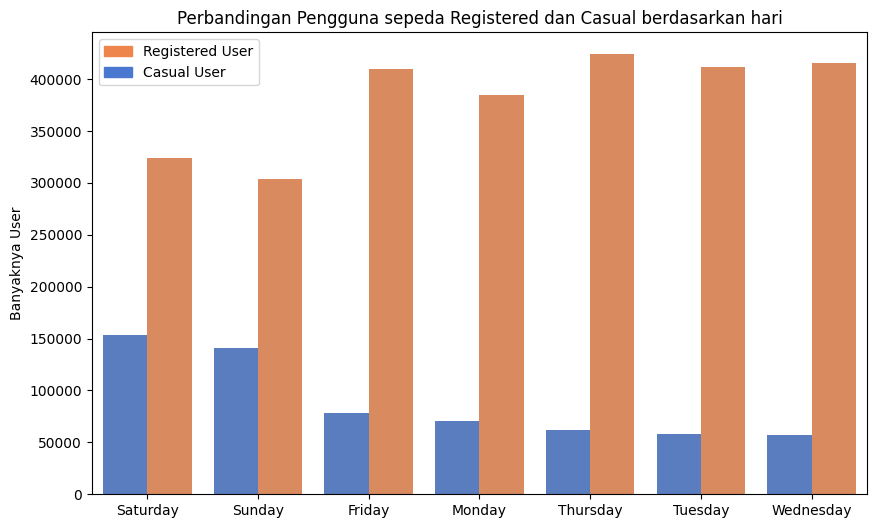

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="day", y="user_count", hue="user_type", data=User_Type, palette="muted")
plt.ylabel("Banyaknya User")
plt.xlabel(None)
plt.title("Perbandingan Pengguna sepeda Registered dan Casual berdasarkan hari")
casual_patch = mpatch.Patch(color=sns.color_palette("muted")[1], label='Registered User')
registered_patch = mpatch.Patch(color=sns.color_palette("muted")[0], label='Casual User')
plt.legend(handles=[casual_patch, registered_patch])
plt.show()

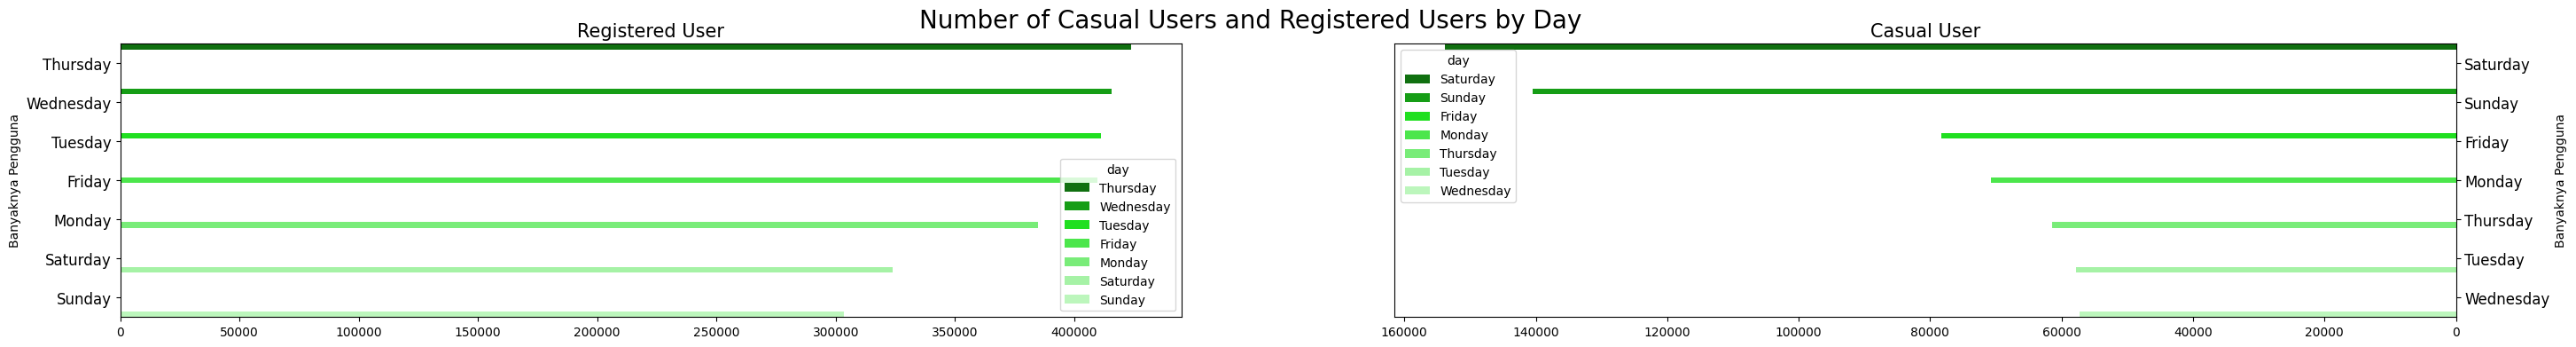

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(34, 4))

colors = ["#008000", "#00b300", "#00ff00", "#33ff33", "#66ff66", "#99ff99", "#b3ffb3"]

sns.barplot(x="registered_user", y="day", data=sum_registered_user, palette=colors, hue="day", ax=ax[0], width=1, dodge=True)
ax[0].set_ylabel("Banyaknya Pengguna")
ax[0].set_xlabel(None)
ax[0].set_title("Registered User", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="casual_user", y="day", data=sum_casual_user, hue="day", palette=colors, ax=ax[1], width=1, dodge=True)
ax[1].set_ylabel("Banyaknya Pengguna")
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Casual User", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Number of Casual Users and Registered Users by Day", fontsize=20)
plt.show()

 # Berdasarkan Visualisasi diatas dapat disimpulkan bahwa:
  - Data memiliki Type data pengguna baru(Casual) dan pengguna lama(Registered)
  - Untuk **registered_user** pengguna sharing bike paling banyak pada hari Kamis sedangkan untuk **casual_user** cenderung lebih banyak pada hari Sabtu

Analisa pengguna Bike sharing (max, min, average) berdasarkan bulanan


In [ ]:
day_df.groupby(by=["year", "month"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]})

date casual_user registered_user total_user        \
               nunique         sum             sum        max   min   
year month                                                            
2011 April          30       22346           72524       5312   795   
     August         31       28842          107849       5895  1115   
     December       31        8448           78875       3940   705   
     February       28        6242           41973       2927  1005   
     January        31        3073           35116       1985   431   
     July           31       36452          104889       6043  3285   
     June           30       30612          112900       5515  3767   
     March          31       12826           51219       3239   605   
     May            31       31050          104771       5805  2633   
     November       30       15594           86573       4486  1495   
     October        31       25222           98289       5511   627   
     September      30       26545          100873       5423  1842   
2012 April          30       38456          135768       7460  1027   
     August         31       43197          171306       7865  4549   
     December       31       13245          110468       6606   441   
     February       29        8721           94416       5062  1529   
     January        31        8969           87775       4521  1301   
     July           31       41705          161902       8173  4459   
     June           30       43294          159536       8120  4127   
     March          31       31618          133257       8362  3194   
     May            31       44235          151630       8294  2843   
     November       30       21009          131655       6852  2277   
     October        31       34538          164303       8156    22   
     September      30       43778          174795       8714  4073   

                                     
                       mean     sum  
year month                           
2011 April      3162.333333   94870  
     August     4409.387097  136691  
     December   2816.870968   87323  
     February   1721.964286   48215  
     January    1231.903226   38189  
     July       4559.387097  141341  
     June       4783.733333  143512  
     March      2065.967742   64045  
     May        4381.322581  135821  
     November   3405.566667  102167  
     October    3984.225806  123511  
     September  4247.266667  127418  
2012 April      5807.466667  174224  
     August     6919.451613  214503  
     December   3990.741935  123713  
     February   3556.448276  103137  
     January    3120.774194   96744  
     July       6567.967742  203607  
     June       6761.000000  202830  
     March      5318.548387  164875  
     May        6318.225806  195865  
     November   5088.800000  152664  
     October    6414.225806  198841  
     September  7285.766667  218573

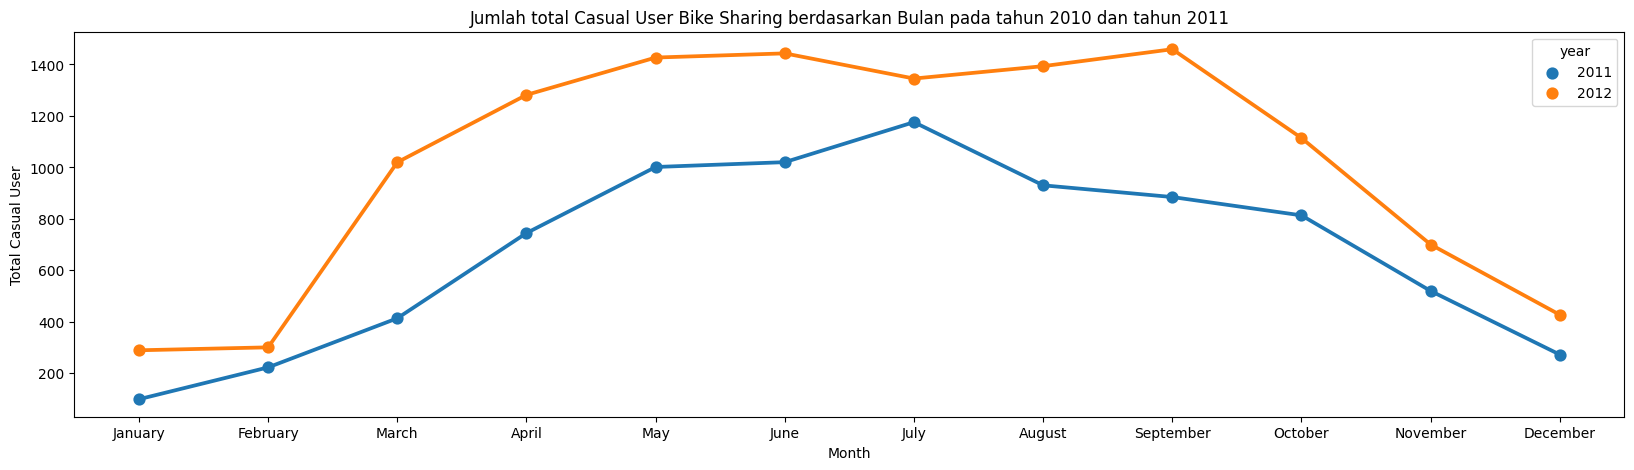

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=day_df, x='month', y='casual_user', hue='year', errorbar=None, ax=ax)
ax.set(title='Jumlah total Casual User Bike Sharing berdasarkan Bulan pada tahun 2010 dan tahun 2011')
ax.set_ylabel('Total Casual User')
ax.set_xlabel('Month')
plt.show()

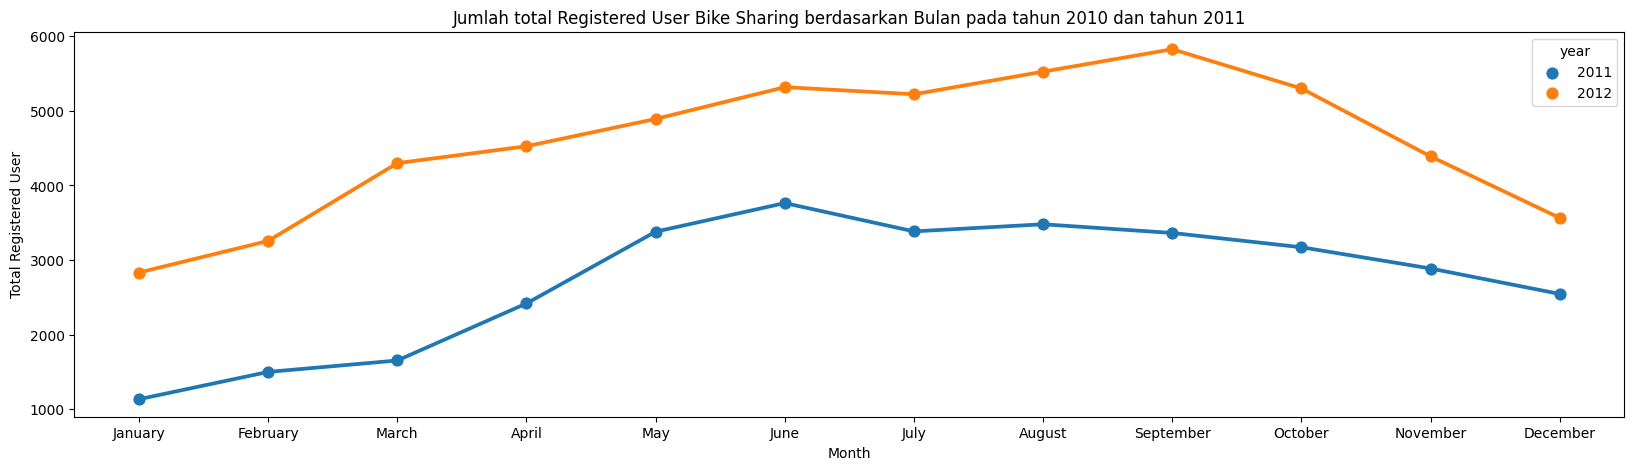

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=day_df, x='month', y='registered_user', hue='year', errorbar=None, ax=ax)
ax.set(title='Jumlah total Registered User Bike Sharing berdasarkan Bulan pada tahun 2010 dan tahun 2011')
ax.set_ylabel('Total Registered User')
ax.set_xlabel('Month')
plt.show()

 # Berdasarkan Visualisasi:
  - Grafik Type User bike sharing berdasarkan bulan di 2 tahun berbeda
  - Untuk **Casual_user** ditahun 2011 pengguna sharing bike paling banyak pada bulan **Juli** dan ditahun 2012 pengguna sharing bike paling banyak pada bulan **September**.
  - Untuk **Registered_user** ditahun 2011 pengguna sharing bike paling banyak pada bulan **Juni** dan ditahun 2012 pengguna sharing bike paling banyak pada bulan **September**.

#Analisa pada data hour.csv

In [ ]:
hour_df.describe(include="all")

<ipython-input-60-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,May,NaN,Saturday,working day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


#Analisa pengguna Bike sharing (max, min, average) berdasarkan Jam pemakaian pada weekend dan working day



In [ ]:
hour_df.groupby(by=["workingday", "hour"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]})

date casual_user registered_user total_user      \
                     nunique         sum             sum        max min   
workingday      hour                                                      
weekend/holiday 0        230        3829           17055        249   6   
                1        230        2876           13111        168   4   
                2        228        2371            9752        132   2   
                3        227        1465            4386         79   2   
                4        227         514            1362         28   1   
                5        222         383            1546         55   1   
                6        229         875            3417        133   1   
                7        231        1988            8039        387   1   
                8        231        4718           19688        597   5   
                9        231       10399           29246        397  14   
                10       231       18311           40804        539  12   
                11       231       24637           48201        663  27   
                12       231       29163           55443        776  32   
                13       231       31514           54587        760  30   
                14       231       32246           51987        750  23   
                15       231       31532           51354        750   7   
                16       231       29710           51770        783  11   
                17       231       25829           48911        731  15   
                18       230       19371           45272        676  23   
                19       230       15076           38209        554  11   
                20       230       10756           29434        551  11   
                21       230        8314           24360        584   7   
                22       230        6453           20241        502   9   
                23       230        4402           15362        239   2   
working day     0        496        3546           14700        283   2   
                1        494        1833            6344        114   1   
                2        487        1041            3188         74   1   
                3        470         428            1895         36   1   
                4        470         360            2192         17   1   
                5        495         629           11703         66   1   
                6        496        2142           48698        213   7   
                7        496        6049          138095        596  18   
                8        496       11043          225552        839  31   
                9        496       12059          107734        426  23   
                10       496       15478           51664        275   8   
                11       496       18649           59833        361  10   
                12       497       20555           79253        471   3   
                13       498       21199           77619        428  11   
                14       498       22843           68576        651  12   
                15       498       23074           77189        601  13   
                16       499       24124          122144        634  13   
                17       499       28391          233729        976  26   
                18       498       25125          220004        977  26   
                19       498       20429          153075        743  18   
                20       498       15622          108738        567  23   
                21       498       12256           80515        398   6   
                22       498        9747           59171        321  11   
                23       498        6663           37514        256   9   

                                          
                            mean     sum  
workingday      hour                      
weekend/holiday 0      90.800000   20884  
                1      69.

Berdasarkan data diatas, bisa disimpulkan bahwa waktu penggunaan bike sharing paling banyak pada **pukul 13.00 di hari weekend dan pada pukul 17.00 di working day**

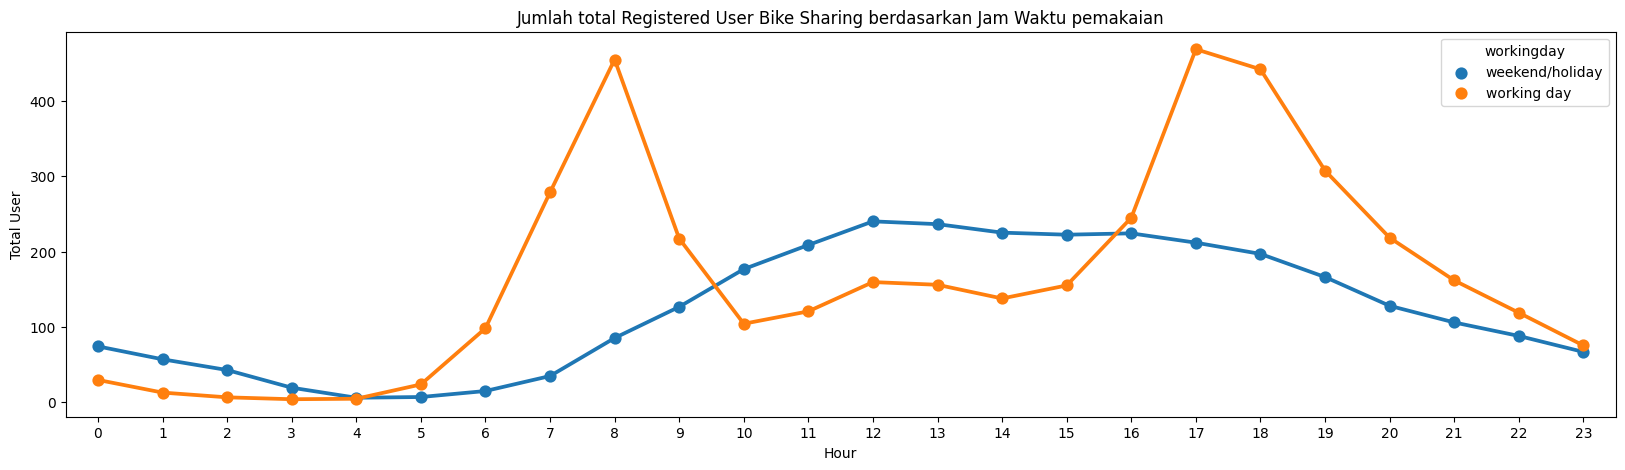

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hour_df, x='hour', y='registered_user', hue='workingday', errorbar=None, ax=ax)
ax.set(title='Jumlah total Registered User Bike Sharing berdasarkan Jam Waktu pemakaian')
ax.set_ylabel('Total User')
ax.set_xlabel('Hour')
plt.show()

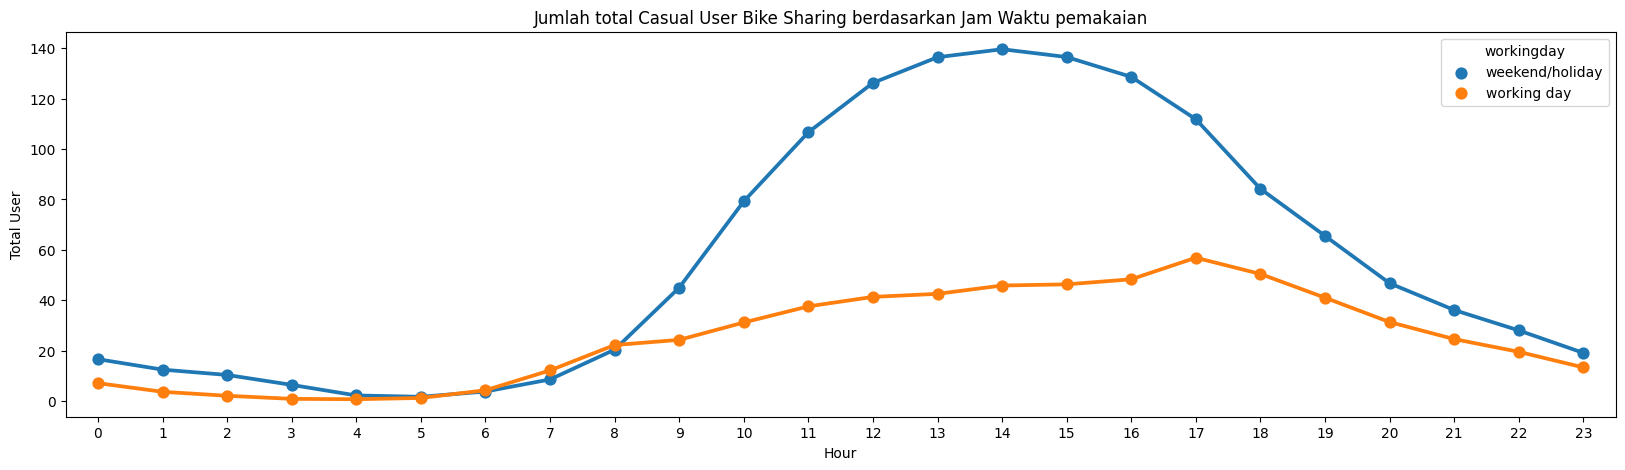

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hour_df, x='hour', y='casual_user', hue='workingday', errorbar=None, ax=ax)
ax.set(title='Jumlah total Casual User Bike Sharing berdasarkan Jam Waktu pemakaian')
ax.set_ylabel('Total User')
ax.set_xlabel('Hour')
plt.show()

 # Berdasarkan Visualisasi:
  - Grafik terdiri dari 2 sudut pandang berbeda, dilihat dari casual user dan juga registered user agar kesimpulan yang ditarik terhadap analisa lebih detail dan melakukan perbadingan terhadap **working day VS holiday**
  - Untuk **Registered_user**, saat *working day* data penggunaan sharing bike paling banyak pada **Pukul 08:00 dan pukul 17:00** dan saat *holiday/weekend* data penggunaan sharing bike paling banyak pada **Pukul 11:00 hingga pukul 17:00**.
  - Untuk **Casual_user**, saat *working day* data penggunaan sharing bike paling banyak pada **pukul 17:00** dan saat *holiday/weekend* data penggunaan sharing bike paling banyak pada **Pukul 13:00 hingga pukul 15:00**.


  Bisa disimpulkan bahwa **Casual User Maupun Registered user** cenderung lebih banyak menggunakan sepeda pada **Pukul 17:00**

#Analisa pengguna Bike sharing (max, min, average) berdasarkan musim dan cuaca.

In [ ]:
hour_df.groupby(by=["season", "weather"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]})

date casual_user registered_user total_user      \
                    nunique         sum             sum        max min   
season   weather                                                         
Fall     Clear          183      174014          627927        977   1   
         Light Snow      72        9727           36529        891   1   
         Mist           140       42350          170582        868   2   
Springer Clear          174       44462          280816        801   1   
         Heavy Rain       3           8             215        164  23   
         Light Snow      75        1392           20250        520   1   
         Mist           146       14760          109445        712   1   
Summer   Clear          177      151197          513266        873   1   
         Light Snow      91        7413           39350        782   1   
         Mist           146       44912          162451        957   1   
Winter   Clear          166       93072          453419        967   1   
         Light Snow      62        4251           39419        856   1   
         Mist           135       32459          218993        905   1   

                                         
                           mean     sum  
season   weather                         
Fall     Clear       244.494207  801941  
         Light Snow  171.955390   46256  
         Mist        224.848997  212932  
Springer Clear       122.055535  325278  
         Heavy Rain   74.333333     223  
         Light Snow   58.650407   21642  
         Mist        103.074689  124205  
Summer   Clear       232.410983  664463  
         Light Snow  115.179803   46763  
         Mist        181.261364  207363  
Winter   Clear       209.463779  546491  
         Light Snow  116.453333   43670  
         Mist        201.483974  251452

Berdasarkan data diatas, bisa disimpulkan bahwa rata-rata penggunaan bike sharing paling banyak terdapat **pada season "Summer" dengan Cuaca "Clear"**

Data perbandingan jumlah total yang disewakan setiap bulannya jika dilihat dari pengguna baru(casual) dan yang sudah terdaftar(registered).

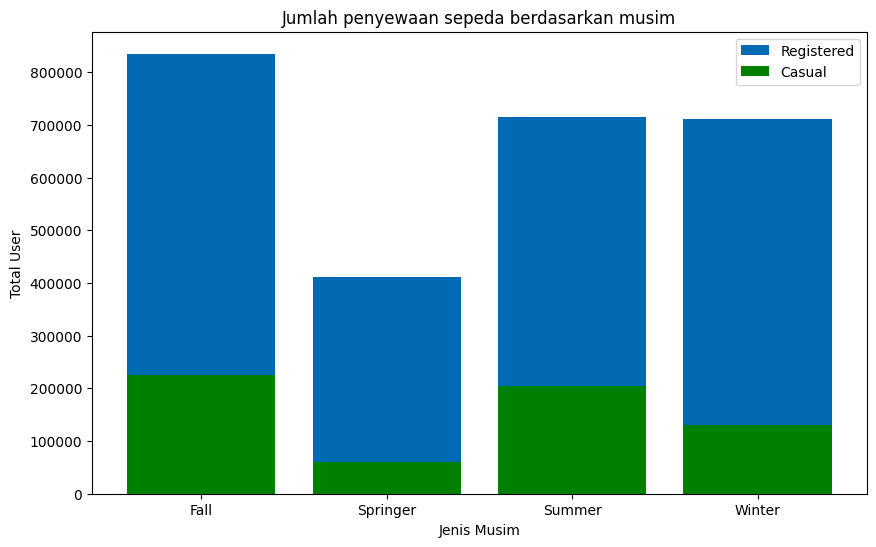

In [ ]:
season = hour_df.groupby('season')[['casual_user', 'registered_user']].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(
    season['season'],
    season['registered_user'],
    label='Registered',
    color='#006bb3'
)

plt.bar(
    season['season'],
    season['casual_user'],
    label='Casual',
    color='#008000'
)

plt.xlabel("Jenis Musim")
plt.ylabel("Total User")
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

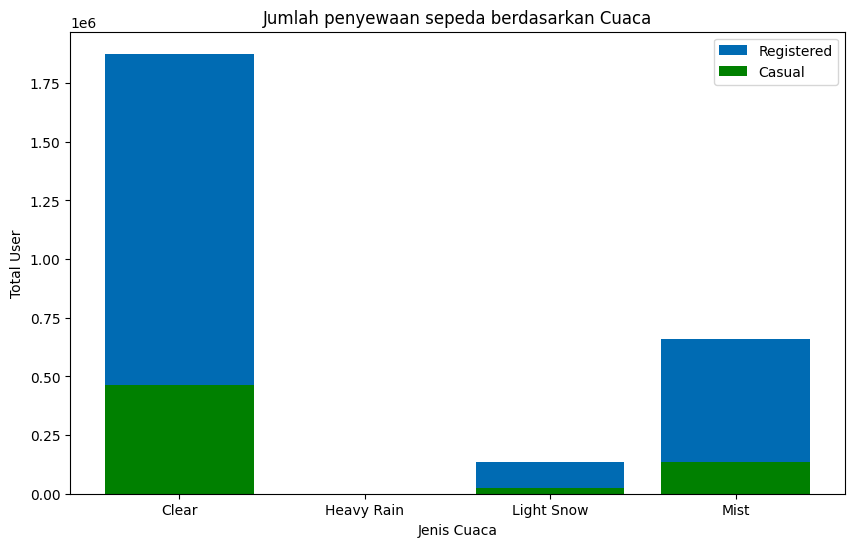

In [ ]:
weather = hour_df.groupby('weather')[['casual_user', 'registered_user']].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(
    weather['weather'],
    weather['registered_user'],
    label='Registered',
    color='#006bb3'
)

plt.bar(
    weather['weather'],
    weather['casual_user'],
    label='Casual',
    color='#008000'
)

plt.xlabel("Jenis Cuaca")
plt.ylabel("Total User")
plt.title('Jumlah penyewaan sepeda berdasarkan Cuaca')
plt.legend()
plt.show()

# Berdasarkan Visualisasi:
  - Grafik terdiri dari 2 sudut pandang berbeda, yang dilihat berdasarkan **Jenis Cuaca**  dan **Jenis Musim** **VS Total User**. Selain itu warna pada grafik juga dibedakan agar menjelaskan jumlah user antara **Registered_user dan Casual_user**.
# Disimpulkan bahwa:
- Disetiap musim yang paling dinikmati bagi para pengguna bike sharing **Casual User Maupun Registered user** adalah musim gugur (Fall), lalu diikuti dengan musim panas (Summer), musim dingin (Winter), dan dimusim semi (Spring) menjadi yang paling sedikit.
- pada grafik **Jenis Cuaca VS Total User** dapat diperhatikan, pengaruh dari cuaca juga sangat menentukan user menggunakan bike sharing, dimana padda cuaca Clear/Cerah yang paling banyak dinikmati bagi para pengguna bike sharing sedangkan pada **Cuaca Heavy Rain** hampir tidak ada pengguna.

#Conclusion
Pertanyaan 1:
- Untuk **registered_user** pengguna sharing bike paling banyak pada hari Kamis sedangkan untuk **casual_user** cenderung lebih banyak pada hari Sabtu.

Pertanyaan 2:
- Penggunaan Bike sharing dari tahun 2011 hingga 2012 meningkat, hal ini dilihat dari kedua grafik **Casual_user VS Bulan** dan **Registered_user VS Bulan** yang berbeda signifikan. Pada **Casual_user** ditahun 2011 pengguna sharing bike paling banyak pada bulan **Juli** dan ditahun 2012 pengguna sharing bike paling banyak pada bulan **September**. Dan untuk **Registered_user** ditahun 2011 pengguna sharing bike paling banyak pada bulan **Juni** dan ditahun 2012 pengguna sharing bike paling banyak pada bulan **September**.

Pertanyaan 3:
- Penggunaan Bike sharing terhadap **working day VS holiday**. Untuk **Registered_user**, saat *working day* data penggunaan sharing bike paling banyak pada **Pukul 08:00 dan pukul 17:00** dan saat *holiday/weekend* data penggunaan sharing bike paling banyak pada **Pukul 11:00 hingga pukul 17:00**. Untuk **Casual_user**, saat *working day* data penggunaan sharing bike paling banyak pada **pukul 17:00** dan saat *holiday/weekend* data penggunaan sharing bike paling banyak pada **Pukul 13:00 hingga pukul 15:00**. Bisa disimpulkan bahwa **Casual User Maupun Registered user** cenderung lebih banyak menggunakan sepeda pada **Pukul 17:00**

Pertanyaan 4:
- Disetiap musim yang paling dinikmati bagi para pengguna bike sharing **Casual User Maupun Registered user** adalah musim gugur (Fall), lalu diikuti dengan musim panas (Summer), musim dingin (Winter), dan dimusim semi (Spring) menjadi yang paling sedikit.
- pada grafik **Jenis Cuaca VS Total User** dapat diperhatikan, pengaruh dari cuaca juga sangat menentukan user menggunakan bike sharing, dimana padda cuaca Clear/Cerah yang paling banyak dinikmati bagi para pengguna bike sharing sedangkan pada **Cuaca Heavy Rain** hampir tidak ada pengguna.